In [1]:
from stfe.gene_utils import get_proliferation_score_cell_cycle, get_emt_score, get_markers_from_var_names
import scanpy as sc
import scprep
import pandas as pd

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [3]:
proliferation_scores = get_proliferation_score_cell_cycle(adata)

HN1 NOT FOUND!
MLF1IP NOT FOUND!
FAM64A NOT FOUND!
MLF1IP NOT FOUND!
FAM64A NOT FOUND!
HN1 NOT FOUND!


In [4]:
proliferation_scores.head()

,phase,S_score,G2M_score,proliferation_score
AAACCTGAGTTCGCGC-1-4,G2M,0.100876,0.250701,0.205355
AAACCTGCAGGACCCT-1-4,S,0.111967,-0.016406,0.017410
AAACCTGCATGTTGAC-1-4,G1,-0.134363,-0.393367,-0.253914
AAACCTGGTCGAACAG-1-4,G1,-0.009610,-0.200481,-0.148891
AAACCTGTCCGTTGCT-1-4,G1,-0.119962,-0.230327,-0.204092


<Axes: xlabel='PHATE1', ylabel='PHATE2'>

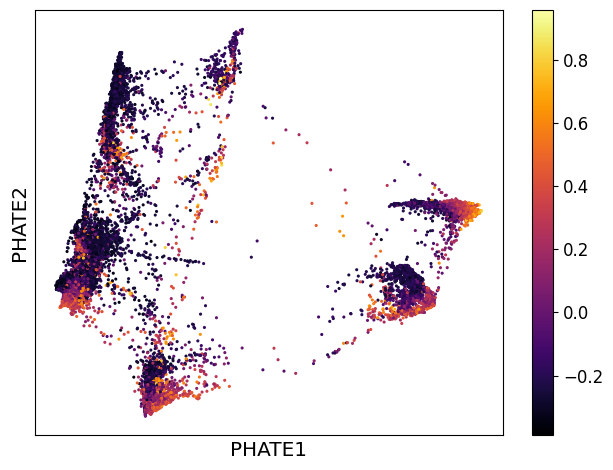

In [5]:
scprep.plot.scatter2d(adata.obsm['X_phate'], c=proliferation_scores['proliferation_score'], ticks=False, label_prefix='PHATE', )


In [6]:
# merging 12 and 18 because they are mostly overlapping.
time_dict = {
    0.0: 0,
    2.0: 1,
    12.0: 2,
    18.0: 3,
    30.0: 4,
}
adata.obs['time'] = adata.obs['day'].map(time_dict)

In [7]:
time_prolif_df = pd.concat([adata.obs['time'], proliferation_scores['proliferation_score']], axis=1)

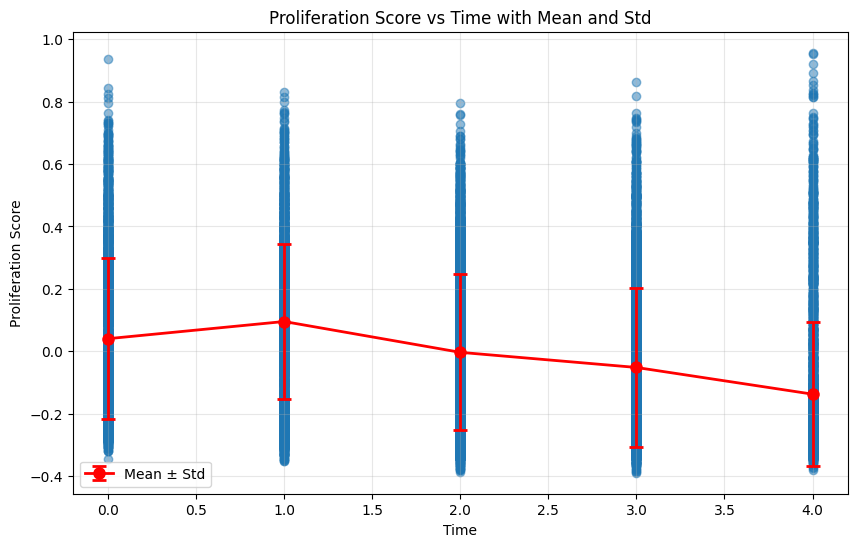

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(time_prolif_df['time'], time_prolif_df['proliferation_score'], alpha=0.5)

# Calculate mean and std for each time point
mean_scores = time_prolif_df.groupby('time')['proliferation_score'].mean()
std_scores = time_prolif_df.groupby('time')['proliferation_score'].std()

# Plot mean and std
plt.errorbar(mean_scores.index, mean_scores.values, yerr=std_scores.values, 
             fmt='o-', color='red', ecolor='red', capsize=5, capthick=2, 
             linewidth=2, markersize=8, label='Mean ± Std')

plt.xlabel('Time')
plt.ylabel('Proliferation Score')
plt.title('Proliferation Score vs Time with Mean and Std')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
